Apa itu aplikasi Digital Talent Scholarship? Program Digital Talent Scholarship adalah program pelatihan pengembangan kompetensi yang telah diberikan kepada talenta digital Indonesia sejak tahun 2018. Program Digital Talent Scholarship didesain untuk menciptakan ekosistem seimbang dalam memaksimalkan peran pentahelix (pemerintah, komunitas/masyarakat, institusi pendidikan tinggi, dunia usaha, dan media) untuk menjadi fasilitator dan akselerator pendukung ekonomi digital.

Situsnya :  *https://digitalent.kominfo.go.id*

Machine Learning memiliki berbagai metode untuk menganalisis dan memprediksi data. Dalam penelitian ini, saya menggunakan metode Naive Bayes. Naive Bayes, atau sering disebut *Naïve Bayes Classifier*, adalah algoritma *machine learning* berbasis probabilistik yang digunakan untuk berbagai tugas klasifikasi.

Naive Bayes memiliki beberapa varian, salah satunya adalah tipe *multinomial*. Tipe ini sering digunakan dalam klasifikasi dokumen, di mana fitur yang dianalisis oleh *classifier* adalah frekuensi kemunculan kata-kata dalam dokumen.

Metode ini sangat efektif dalam menangani masalah klasifikasi teks karena kemampuannya mengukur probabilitas berdasarkan frekuensi kata.

**Tahap Penelitian**

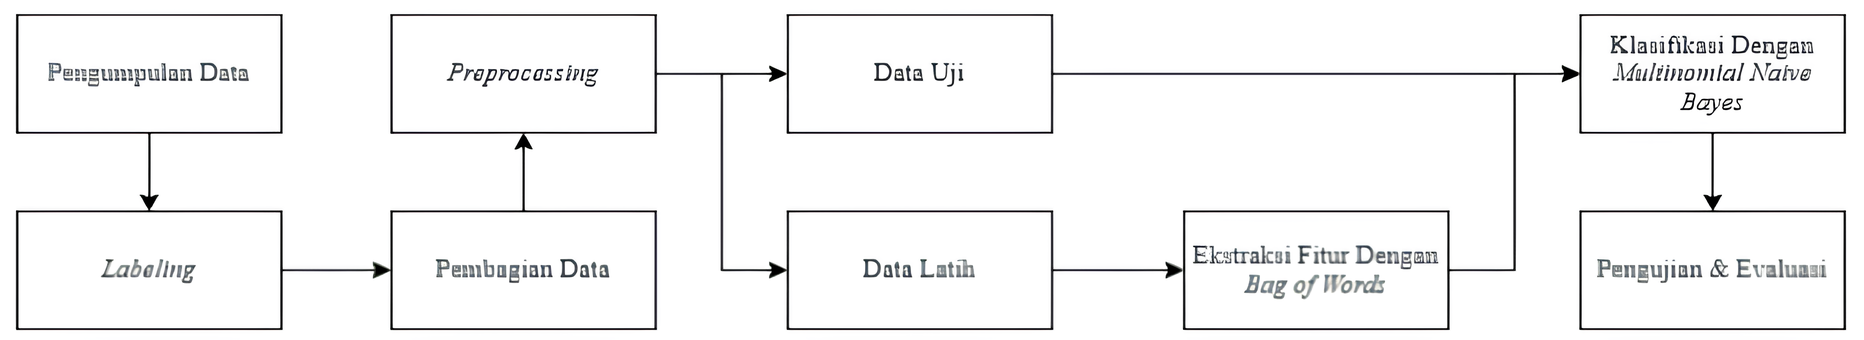

In [49]:
#install the google-play-scrapper library to capture data from the Google Play Store
!pip install google-play-scraper

# **Data Collection**

In [50]:
from google_play_scraper import Sort, reviews

result, continuation_token = reviews(
    'id.go.kominfo.digitalent', #link app store
    lang = 'id', #defaults to 'id'
    country = 'id', #defaults to 'id'
    sort = Sort.MOST_RELEVANT, #get data newest
    count = 1000, #defaults get try 1000 data
    filter_score_with = None #defaults to None(means all score) Use 1 or 2 or 3 or 4 or 5 to select certain score
)

In [51]:
#import pandas and numpy
import pandas as pd
import numpy as np

df_data = pd.DataFrame(np.array(result), columns=['content'])

df_data = df_data.join(pd.DataFrame(df_data.pop('content').tolist()))

#Show reviewId and content data
df_data = df_data[['reviewId', 'content']] # Change 'id' to 'reviewId'

df_data.head(10)

,reviewId,content
0,7c616a1c-e419-488b-bde7-890c3f31c384,Digital Talent ngk jelas.. Kenapa sih penerima...
1,be365fd7-2042-4d23-9633-c95c08f50f65,Trimksh untuk pelatihan nya.. Sangat bermanfaa...
2,c8f2870e-1a8a-44fc-b998-a25db5a4f61a,Terima kasih kominfo melalui BPPTIK yang sudah...
3,6e5267d0-8702-49ae-9a55-646a938b82f8,Belum coba ... Karena yang saya siriti biasany...
4,d55ffc5d-c703-483e-8b8c-907992375efc,Terima kasih Kominfo atas pelayanan dan pelati...
5,b8498a59-7b69-4455-bda8-3faf5b5a54e2,"Lagi pelatihan FGA, pake absen scan qris tapi ..."
6,28de9e91-22ca-4071-84d6-5eb5e79ba62a,Hallo min tong di perbaiki dong itu yg bagian ...
7,4c93f7db-7106-4ca4-83a5-6047b1c66b0b,Sangat menarik Dan menambah wawasan
8,8ff4135d-7217-4c5d-8fc2-ec97bff88643,semoga aplikasinya dapat mengatasi bug dan ber...
9,3849f36d-4a3a-4b46-8fc0-decce36859f9,Tolong buat menu histori/riwayat pelatihan yg ...


In [52]:
data = df_data[['reviewId', 'content']]

data.to_csv("Data_Awal_DTS.csv", index = False)

# **Labelling Data**

In [53]:
df_data = pd.DataFrame(np.array(result), columns=['review'])

df_data = df_data.join(pd.DataFrame(df_data.pop('review').tolist()))

df_data.head(10)

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion
0,7c616a1c-e419-488b-bde7-890c3f31c384,Anisa Mandasari,https://play-lh.googleusercontent.com/a/ACg8oc...,Digital Talent ngk jelas.. Kenapa sih penerima...,1,0,3.0.5,2024-11-04 05:12:53,"Hi digiers, mohon maaf atas ketidaknyamanannya...",2024-09-12 07:40:01,3.0.5
1,be365fd7-2042-4d23-9633-c95c08f50f65,Tutik Haryati,https://play-lh.googleusercontent.com/a/ACg8oc...,Trimksh untuk pelatihan nya.. Sangat bermanfaa...,5,1,3.0.4,2024-10-03 22:18:31,"Hi digiers, terima kasih atas ulasan dan ratin...",2024-10-04 04:33:14,3.0.4
2,c8f2870e-1a8a-44fc-b998-a25db5a4f61a,Rian Firnanda (D1D022036),https://play-lh.googleusercontent.com/a-/ALV-U...,Terima kasih kominfo melalui BPPTIK yang sudah...,5,2,3.0.3,2024-09-20 15:16:07,"Hi digiers, terima kasih atas ulasan yang dibe...",2024-09-23 03:54:21,3.0.3
3,6e5267d0-8702-49ae-9a55-646a938b82f8,McAer The Arbanats (McAer Rawonese ID),https://play-lh.googleusercontent.com/a-/ALV-U...,Belum coba ... Karena yang saya siriti biasany...,3,0,3.0.5,2024-10-07 09:50:16,"Hi digiers, silahkan registrasi akun terlebih ...",2024-10-10 04:42:42,3.0.5
4,d55ffc5d-c703-483e-8b8c-907992375efc,Rian Prastiono,https://play-lh.googleusercontent.com/a-/ALV-U...,Terima kasih Kominfo atas pelayanan dan pelati...,5,1,3.0.4,2024-09-23 04:02:10,"Hi digiers, terima kasih atas ulasan dan ratin...",2024-09-24 06:10:40,3.0.4
5,b8498a59-7b69-4455-bda8-3faf5b5a54e2,Fitrah Nurul Latifa Suyoto,https://play-lh.googleusercontent.com/a-/ALV-U...,"Lagi pelatihan FGA, pake absen scan qris tapi ...",1,1,3.0.2,2024-07-09 09:25:30,"Hi digiers, mohon maaf atas ketidaknyamanannya...",2024-07-13 08:23:19,3.0.2
6,28de9e91-22ca-4071-84d6-5eb5e79ba62a,lamj hal,https://play-lh.googleusercontent.com/a/ACg8oc...,Hallo min tong di perbaiki dong itu yg bagian ...,3,0,3.0.2,2024-06-19 13:18:19,"Hi digiers, mohon maaf atas ketidaknyamanannya...",2024-06-20 08:54:00,3.0.2
7,4c93f7db-7106-4ca4-83a5-6047b1c66b0b,Ady N,https://play-lh.googleusercontent.com/a-/ALV-U...,Sangat menarik Dan menambah wawasan,5,0,3.0.5,2024-11-11 03:05:06,"Hi digiers, terima kasih atas ulasan dan ratin...",2024-11-11 03:57:21,3.0.5
8,8ff4135d-7217-4c5d-8fc2-ec97bff88643,Abdul Mukhit,https://play-lh.googleusercontent.com/a-/ALV-U...,semoga aplikasinya dapat mengatasi bug dan ber...,2,0,3.0.3,2024-09-22 12:51:22,"Hi digiers, terima kasih atas ulasan yang dibe...",2024-09-23 03:53:25,3.0.3
9,3849f36d-4a3a-4b46-8fc0-decce36859f9,Muhammad Desri Murdianto,https://play-lh.googleusercontent.com/a-/ALV-U...,Tolong buat menu histori/riwayat pelatihan yg ...,5,0,3.0.5,2024-11-07 01:20:21,"Hi digeirs, untuk melakukan download sertifika...",2024-11-07 03:13:48,3.0.5


In [54]:
len(df_data.index)

650

In [55]:
df_data[['userName', 'score', 'at', 'content']].head(10)

if 'score' in df_data.columns:
    Sentiment = []
    for index, row in df_data.iterrows():
        if row['score'] > 3:
            Sentiment.append('positif')  # Change 1 to ‘positive’
        elif row['score'] == 3:
            Sentiment.append('netral')  # Change 3 to "netral"
        else:
            Sentiment.append('negatif')  # Convert -1 and 0 to ‘negative’
    df_data['Sentiment'] = Sentiment

In [56]:
# Selecting only the ‘content’ and ‘Sentiment’ columns
df = df_data[['content', 'Sentiment']]

# Display the first five rows of the filtered DataFrame
df.head(10)

,content,Sentiment
0,Digital Talent ngk jelas.. Kenapa sih penerima...,negatif
1,Trimksh untuk pelatihan nya.. Sangat bermanfaa...,positif
2,Terima kasih kominfo melalui BPPTIK yang sudah...,positif
3,Belum coba ... Karena yang saya siriti biasany...,netral
4,Terima kasih Kominfo atas pelayanan dan pelati...,positif
5,"Lagi pelatihan FGA, pake absen scan qris tapi ...",negatif
6,Hallo min tong di perbaiki dong itu yg bagian ...,netral
7,Sangat menarik Dan menambah wawasan,positif
8,semoga aplikasinya dapat mengatasi bug dan ber...,negatif
9,Tolong buat menu histori/riwayat pelatihan yg ...,positif


In [57]:
from google_play_scraper import Sort, reviews
import pandas as pd
import numpy as np

# Function to analyze sentiment per word
def analyze_sentiment_per_word(text):
    sentiment_per_word = {}
    words = text.lower().split()  # Split into words, convert to lowercase

    for word in words:
        if word in ['bagus', 'keren', 'mantap']:
            sentiment_per_word[word] = 'positif'
        elif word in ['buruk', 'jelek', 'error']:
            sentiment_per_word[word] = 'negatif'
        else:
            sentiment_per_word[word] = 'netral'

    return sentiment_per_word

# Example usage
for index, row in df.iterrows():
    content = row['content']
    sentiment_analysis = analyze_sentiment_per_word(content)
    print(f"Review: {content}")
    for word, sentiment in sentiment_analysis.items():
        print(f"  Word: {word}, Sentiment: {sentiment}")
    print("-" * 20)

Review: Digital Talent ngk jelas.. Kenapa sih penerimaan sertifikat pelatihan nya lama sekali.. Yang offline hanya butuh menunggu sebulan untuk menerima sertifikat nya.. Sedangkan yang online butuh 4 bulan untuk mendapatkan sertifikat nya.. Di tambah benefit biaya komunikasi tidak diberikan sama sekali.. Kami para peserta pelatihan kualahan menunggu nya... Korupsi sekali kalian wahai Kominfo
  Word: digital, Sentiment: netral
  Word: talent, Sentiment: netral
  Word: ngk, Sentiment: netral
  Word: jelas.., Sentiment: netral
  Word: kenapa, Sentiment: netral
  Word: sih, Sentiment: netral
  Word: penerimaan, Sentiment: netral
  Word: sertifikat, Sentiment: netral
  Word: pelatihan, Sentiment: netral
  Word: nya, Sentiment: netral
  Word: lama, Sentiment: netral
  Word: sekali.., Sentiment: netral
  Word: yang, Sentiment: netral
  Word: offline, Sentiment: netral
  Word: hanya, Sentiment: netral
  Word: butuh, Sentiment: netral
  Word: menunggu, Sentiment: netral
  Word: sebulan, Sentime

Total positive      : 525
Total netral      : 28
Total negative      : 97
Total data          : 650


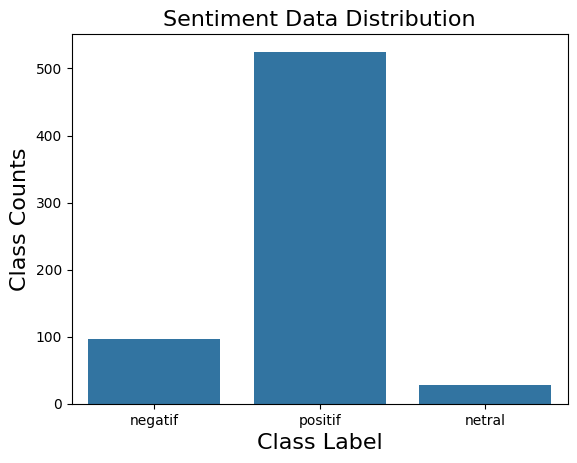

In [58]:
import seaborn as sns
import matplotlib.pyplot as plt

# Visualisation of sentiment result distribution
sns.countplot(x='Sentiment', data=df_data)  # Using df_data as a data source
plt.title('Sentiment Data Distribution', fontsize=16)
plt.ylabel('Class Counts', fontsize=16)
plt.xlabel('Class Label', fontsize=16)
plt.xticks(rotation='horizontal')

# Count the number of positive and negative sentiments
positif = df_data[df_data['Sentiment'] == 'positif']
netral = df_data[df_data['Sentiment'] == 'netral']
negatif = df_data[df_data['Sentiment'] == 'negatif']

# Display calculation results
print('Total positive      : {}'.format(len(positif)))
print('Total netral      : {}'.format(len(netral)))
print('Total negative      : {}'.format(len(negatif)))
print('Total data          : {}'.format(df_data.shape[0]))

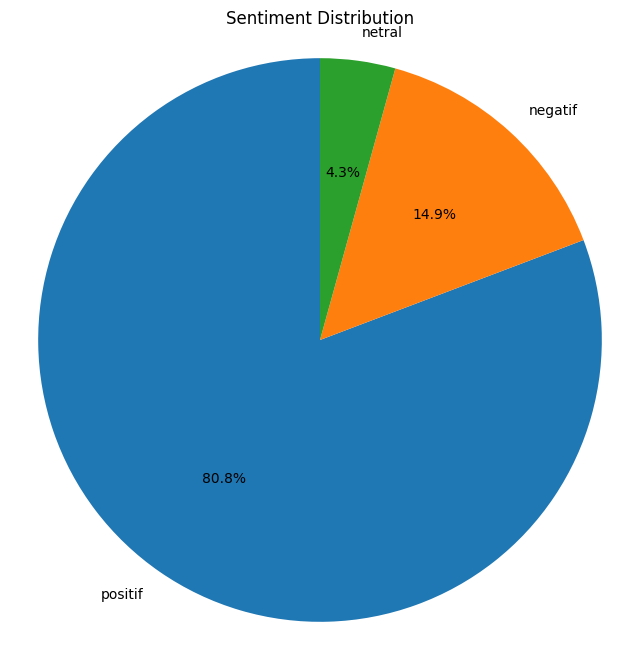

In [59]:
import matplotlib.pyplot as plt

# Count the number of positive and negative sentiments
sentiment_counts = df_data['Sentiment'].value_counts()

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Sentiment Distribution')
plt.axis('equal')
plt.show()

# **Preprocessing**

**1.** Case Folding

Case folding merupakan proses merubah huruf kapital menjadi huruf non kapital agar teks mempunyai struktur yang sama dan mudah untuk di proses.

In [60]:
#-- CASE FOLDING --
import string
import re

# Function case folding
def casef(text):
    # Convert all to lowercase first
    text = text.lower()
    # Eliminate excess spaces at the beginning and end of the text
    text = text.strip()
    return text
df_data['content'] = df_data['content'].apply(casef)  # case folding
result_casefold = df_data['content']
result_casefold

,content
0,digital talent ngk jelas.. kenapa sih penerima...
1,trimksh untuk pelatihan nya.. sangat bermanfaa...
2,terima kasih kominfo melalui bpptik yang sudah...
3,belum coba ... karena yang saya siriti biasany...
4,terima kasih kominfo atas pelayanan dan pelati...
...,...
645,keren
646,khereeen
647,good
648,bagus


**2.** Filtering

Filtering adalah proses yang digunakan untuk membersihkan atau memproses teks dengan cara menghapus elemen-elemen yang tidak diinginkan atau tidak relevan. Dalam konteks pemrosesan teks, filtering bertujuan untuk meningkatkan kualitas data yang akan digunakan untuk analisis atau pemodelan lebih lanjut.

In [61]:
# Filtering function for text
def filter_text(text):
    # Remove tabs, new lines, and backslashes
    text = text.replace('\t', " ").replace('\n', " ").replace('\\', "")
    # Remove non-ASCII characters (emoticons, Chinese words, etc.)
    text = text.encode('ascii', 'ignore').decode('ascii')
    # Eliminate mentions, links, and hashtags
    text = ' '.join(re.sub(r"([@#][A-Za-z0-9]+)|(\w+:\/\/\S+)", " ", text).split())
    # Eliminate incomplete URLs
    text = text.replace("http://", " ").replace("https://", " ")
    # Eliminate numbers
    text = re.sub(r"\d+", "", text)
    # Eliminate punctuation
    text = text.translate(str.maketrans("", "", string.punctuation))
    # Remove non-alphanumeric characters (leaving only letters and numbers)
    text = re.sub(r'[^a-z0-9\s]', '', text)
    # Remove double spaces in text
    text = re.sub(r'\s+', ' ', text)
    return text

# Apply the filtering function
df_data['content'] = df_data['content'].apply(filter_text)  # filtering

# Remove rows with empty content or list (e.g., [])
df_data = df_data[df_data['content'].apply(lambda x: len(x) > 0)]

# View the results of filtering
result_filtering = df_data['content']
result_filtering

,content
0,digital talent ngk jelas kenapa sih penerimaan...
1,trimksh untuk pelatihan nya sangat bermanfaat ...
2,terima kasih kominfo melalui bpptik yang sudah...
3,belum coba karena yang saya siriti biasanya ap...
4,terima kasih kominfo atas pelayanan dan pelati...
...,...
645,keren
646,khereeen
647,good
648,bagus


In [62]:
# Export the cleaned data to a CSV file
df_data[['content', 'Sentiment']].to_csv("Data_Bersih_DTS.csv", index=False)

**3.** Tokenizing

Tokenizing adalah proses mengubah teks menjadi token/unit lebih kecil, seperti kata - kata atau frasa, dengan menghilangkan karakter - karakter seperti spasi atau tanda baca sebagai pemisah

In [63]:
# ------ Tokenizing ---------
import nltk
nltk.download('punkt_tab')
# import word_tokenize & FreqDist from NLTK
from nltk.tokenize import word_tokenize

# NLTK word tokenize
def word_tokenize_wrapper(text):
  return word_tokenize(text)

df_data['token_comment'] = df_data['content'].apply(word_tokenize_wrapper)

# Display all tokenizing data
print('Tokenizing Result : \n')
print(df_data['token_comment'].to_string())

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


Tokenizing Result : 

0      [digital, talent, ngk, jelas, kenapa, sih, pen...
1      [trimksh, untuk, pelatihan, nya, sangat, berma...
2      [terima, kasih, kominfo, melalui, bpptik, yang...
3      [belum, coba, karena, yang, saya, siriti, bias...
4      [terima, kasih, kominfo, atas, pelayanan, dan,...
5      [lagi, pelatihan, fga, pake, absen, scan, qris...
6      [hallo, min, tong, di, perbaiki, dong, itu, yg...
7              [sangat, menarik, dan, menambah, wawasan]
8      [semoga, aplikasinya, dapat, mengatasi, bug, d...
9      [tolong, buat, menu, histoririwayat, pelatihan...
10     [gak, bisa, login, masalah, connection, padaha...
11     [susah, untuk, pengisian, form, sudah, pilih, ...
12     [aplikasi, nya, bikin, hp, saya, error, volume...
13     [pengalaman, di, bilang, teknik, elektro, pern...
14     [uiux, nya, sangat, amat, smooth, beda, sekali...
15     [hai, kak, saya, berharap, digital, kominfo, j...
16     [bintang, satu, dulu, ada, bug, di, galaxy, j,...
17     [s

**4.** Normalization

Normalization adalah tahapan pengolahan atau perbaikan pada kata-kata yang tidak baku akibat dari kesalahan ketik, penyingkatan dan sebagainya menjadi kata baku.

In [64]:
#-- NORMALIZATION --
normalized_word = df_data

normalized_word_dict = {
    'trimksh': 'terima kasih',
    'brhrga': 'berharga',
    'lahhhhhhh': 'lah',
    'bgt': 'banget',
    'app': 'aplikasi',
    'apps': 'aplikasi',
    'mntpa': 'mantap',
    'pelatihzn': 'pelatihan',
    'bingitssss': 'banget',
    'slikk': 'kemampuan',
    'yg': 'yang',
    'sngt' : 'sangat',
    'sangt': 'sangat',
    'apk': 'aplikasi',
    'koq': 'kenapa',
    'kok': 'kenapa',
    'bobrok': 'rusak',
    'inj': 'ini',
    'bagussss': 'bagus',
    'nggk': 'tidak',
    'tdk': 'tidak',
    'ga': 'tidak',
    'gak': 'tidak',
    'ok': 'oke',
    'dlm': 'dalam',
    'dg': 'dengan',
    'mantull': 'mantap betul',
    'mantul': 'mantap betul',
    'wadah': 'tempat',
    'gas': 'ayo',
    'lawas': 'lama',
    'bisabisa': 'bisa',
    'lg': 'lagi',
    'precess': 'proses',
    'ntapz': 'mantap',
    'biiznillah': 'bismillah',
    'goood': 'bagus',
    'good': 'bagus',
    'bugs': 'kesalahan',
    'pdhl': 'padahal',
    'dts': 'digital talent scholarship',
    'khereeen': 'keren',
    'utk': 'untuk',
    'mantpa': 'mantap',
    'banyan': 'banyak',
    'dgn': 'dengan',
    'jd': 'jadi'
}

for index, row in normalized_word.iterrows():
    if row[0] not in normalized_word_dict:
        normalized_word_dict[row[0]] = row[1]

def normalized_term(document):
    return [normalized_word_dict[term] if term in normalized_word_dict else term for term in document]

df_data['normalization_comment'] = df_data['token_comment'].apply(normalized_term)

# Display all normalized data
print('Normalization Result : \n')
print(df_data['normalization_comment'].to_string())

Normalization Result : 

0      [digital, talent, ngk, jelas, kenapa, sih, pen...
1      [terima kasih, untuk, pelatihan, nya, sangat, ...
2      [terima, kasih, kominfo, melalui, bpptik, yang...
3      [belum, coba, karena, yang, saya, siriti, bias...
4      [terima, kasih, kominfo, atas, pelayanan, dan,...
5      [lagi, pelatihan, fga, pake, absen, scan, qris...
6      [hallo, min, tong, di, perbaiki, dong, itu, ya...
7              [sangat, menarik, dan, menambah, wawasan]
8      [semoga, aplikasinya, dapat, mengatasi, bug, d...
9      [tolong, buat, menu, histoririwayat, pelatihan...
10     [tidak, bisa, login, masalah, connection, pada...
11     [susah, untuk, pengisian, form, sudah, pilih, ...
12     [aplikasi, nya, bikin, hp, saya, error, volume...
13     [pengalaman, di, bilang, teknik, elektro, pern...
14     [uiux, nya, sangat, amat, smooth, beda, sekali...
15     [hai, kak, saya, berharap, digital, kominfo, j...
16     [bintang, satu, dulu, ada, bug, di, galaxy, j,...
17    

<ipython-input-64-a8ab1bd72c29>:55: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if row[0] not in normalized_word_dict:
<ipython-input-64-a8ab1bd72c29>:56: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  normalized_word_dict[row[0]] = row[1]


**5.** Stopwords Removal

Stopwords Removal merupakan proses menghilangkan kata - kata umum yang sering muncul dalam dataset. Kata - kata tersebut biasanya tidak memberikan banyak informasi tentang isi teks dan dapat menghambat analisis atau model prediksi

In [65]:
#-- STOPWORDS REMOVAL --
import nltk
from nltk.corpus import stopwords

# Make sure to download the NLTK stopwords list
nltk.download('stopwords')

# Get the stopwords from NLTK
nltk_stopwords = set(stopwords.words('indonesian'))

# Add two initial stopwords from NLTK and some additional stopwords
list_stopwords = nltk_stopwords.union({"mwehehehehe", "di", "si", "yuk", "x", "hayuk", "dah", "joz", "jos", "d", "lah", "ja"})

# Function to remove stopwords
def stopwords_removal(words):
    return [word for word in words if word not in list_stopwords]

# Apply stopwords removal on each normalized comment
df_data['comment_filtered'] = df_data['normalization_comment'].apply(stopwords_removal)

# Remove rows where the 'comment_filtered' is an empty list
df_data = df_data[df_data['comment_filtered'].apply(lambda x: len(x) > 0)]

# Show the data after stopwords removal
print(df_data['comment_filtered'].to_string(index=False))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


[digital, talent, ngk, sih, penerimaan, sertifi...
[terima kasih, pelatihan, nya, bermanfaat, bagu...
[terima, kasih, kominfo, bpptik, menyelenggarak...
[coba, siriti, aplijasi, penerintah, rerata, ui...
[terima, kasih, kominfo, pelayanan, pelatihanny...
[pelatihan, fga, pake, absen, scan, qris, lamba...
[hallo, min, tong, perbaiki, pendaftaran, pengi...
                      [menarik, menambah, wawasan]
[semoga, aplikasinya, mengatasi, bug, berjalan,...
[tolong, menu, histoririwayat, pelatihan, ikuti...
              [login, connection, jaringan, bagus]
[susah, pengisian, form, pilih, jenjang, smksma...
[aplikasi, nya, bikin, hp, error, volume, turun...
[pengalaman, bilang, teknik, elektro, belajar, ...
[uiux, nya, smooth, beda, aplikasi, institusi, ...
[hai, kak, berharap, digital, kominfo, pelatiha...
[bintang, bug, galaxy, j, plus, android, versi,...
                [membantu, informasi, beasiswa, s]
[mohon, perbaiki, bug, android, android, versi,...
[aplikasi, bagus, aja, sistemny

**6.** Stemming

Stemming merupakan tahapan mengubah suatu kata menjadi kata dasar dengan menghapus imbuhan dan akhiran tertentu.

In [66]:
!pip install Sastrawi
!pip install swifter

# Sastrawi import package
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
import swifter
# create a stemmer
factory = StemmerFactory()
stemmer = factory.create_stemmer()

# stemmer
def stemmed_wrapper(term):
    return stemmer.stem(term)

term_dict = {}

# Assuming 'comment_filtered' column in 'df_data' contains the output from stopwords removal
# Change 'df' to 'df_data' and 'clean_stop' to 'comment_filtered'
for document in df_data['comment_filtered']:
    for term in document:
        if term not in term_dict:
            term_dict[term] = ' '

print(len(term_dict))
print("------------------------")

for term in term_dict:
    term_dict[term] = stemmed_wrapper(term)
    print(term,":",term_dict[term])

print(term_dict)
print("------------------------")

# apply stemmed terms to the data frame
def get_stemmed_term(document):
    return [term_dict[term] for term in document]

# Change 'df' to 'df_data' and 'clean_stop' to 'comment_filtered'
df_data['stemm'] = df_data['comment_filtered'].swifter.apply(get_stemmed_term)
print(df_data.head())

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 4.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 11.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
INFO: pip is looking at multiple versions of dask-expr to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 243.2/243.2 kB 18.6 MB/s eta 0:00:00
  Created wheel for swifter: filename=swifter-1.4.0-py3-none-any.whl size=16507 sha256=ddfea1f86123f7176092d0de595bd90375209696773a5c3bd139a6325e004794
  Stored in directory: /root/.cache/pip/wheels/e4/cf/51/0904952972ee2c7aa3709437065278dc534ec1b8d2ad41b443
Successfully built swifter
962
------------------------
digital : digital
talent : talent
ngk : ngk
sih : sih
penerimaan : terima
sertifikat : sertifikat
pelatihan : latih
nya : nya
offline : offline
butuh : butuh
menunggu : tunggu
sebulan : bulan
menerima : terima
online : online
benefit : benefit
biaya : biaya


Pandas Apply:   0%|          | 0/620 [00:00<?, ?it/s]

                               reviewId  \
0  7c616a1c-e419-488b-bde7-890c3f31c384   
1  be365fd7-2042-4d23-9633-c95c08f50f65   
2  c8f2870e-1a8a-44fc-b998-a25db5a4f61a   
3  6e5267d0-8702-49ae-9a55-646a938b82f8   
4  d55ffc5d-c703-483e-8b8c-907992375efc   

                                 userName  \
0                         Anisa Mandasari   
1                           Tutik Haryati   
2               Rian Firnanda (D1D022036)   
3  McAer The Arbanats (McAer Rawonese ID)   
4                          Rian Prastiono   

                                           userImage  \
0  https://play-lh.googleusercontent.com/a/ACg8oc...   
1  https://play-lh.googleusercontent.com/a/ACg8oc...   
2  https://play-lh.googleusercontent.com/a-/ALV-U...   
3  https://play-lh.googleusercontent.com/a-/ALV-U...   
4  https://play-lh.googleusercontent.com/a-/ALV-U...   

                                             content  score  thumbsUpCount  \
0  digital talent ngk jelas kenapa sih penerimaan...   

<ipython-input-66-e6fe4e62f15c>:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_data['stemm'] = df_data['comment_filtered'].swifter.apply(get_stemmed_term)


# **WordCloud**

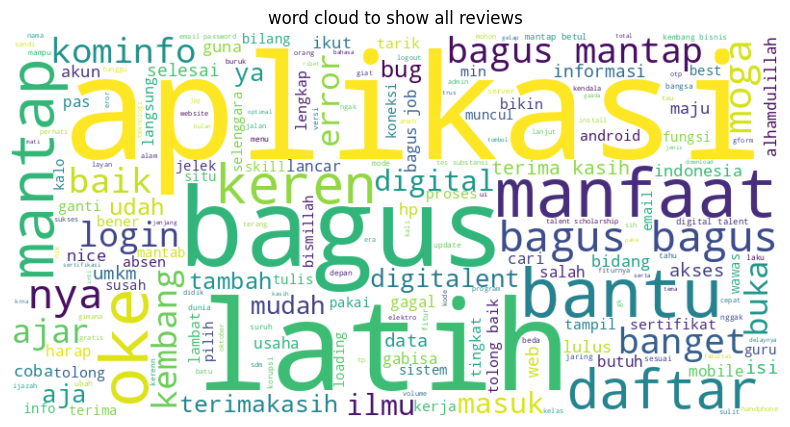

In [67]:
!pip install wordcloud

import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Assuming df_data['stemm'] contains a list of stemmed words for each review
all_words = [word for sublist in df_data['stemm'] for word in sublist]
text = " ".join(all_words)

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Display the generated image:
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("word cloud to show all reviews")
plt.show()

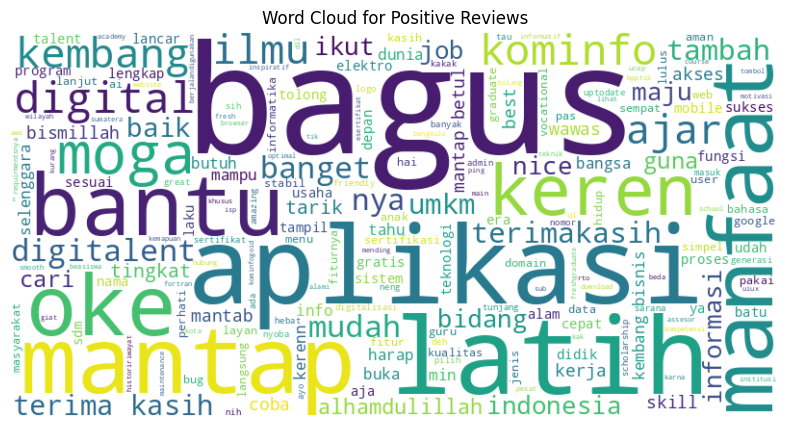

In [68]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Assuming df_data['stemm'] contains a list of stemmed words for each review
positive_reviews = df_data[df_data['Sentiment'] == 'positif']
positive_words = [word for sublist in positive_reviews['stemm'] for word in sublist]
positive_text = " ".join(positive_words)

# Generate the word cloud for positive reviews
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(positive_text)

# Display the generated image:
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Word Cloud for Positive Reviews")
plt.show()

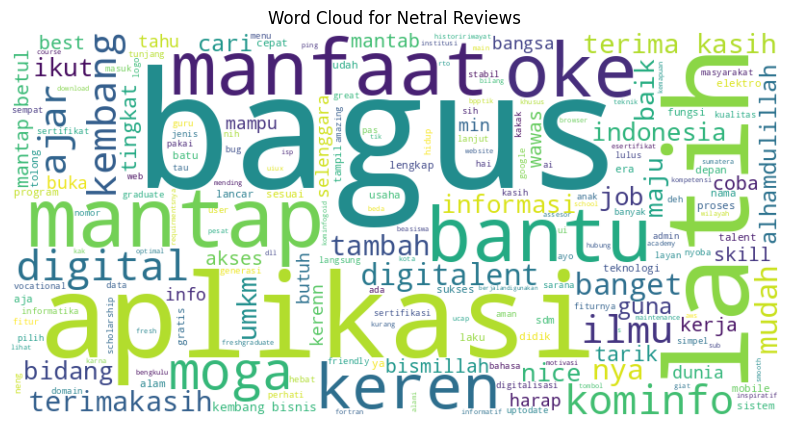

In [69]:
# Assuming df_data['stemm'] contains a list of stemmed words for each review
netral_reviews = df_data[df_data['Sentiment'] == 'netral']
netral_words = [word for sublist in netral_reviews['stemm'] for word in sublist]
netral_text = " ".join(netral_words)

# Generate the word cloud for netral reviews
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(positive_text)

# Display the generated image:
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Word Cloud for Netral Reviews")
plt.show()

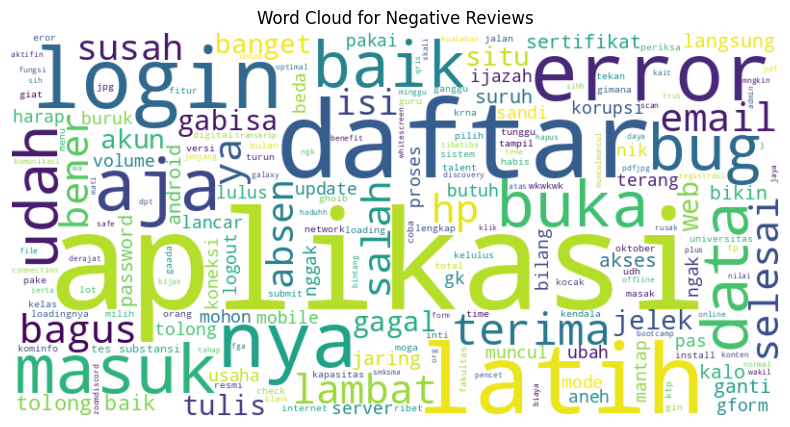

In [70]:
# Assuming df_data['stemm'] contains a list of stemmed words for each review
negative_reviews = df_data[df_data['Sentiment'] == 'negatif']
negative_words = [word for sublist in negative_reviews['stemm'] for word in sublist]
negative_text = " ".join(negative_words)

# Generate the word cloud for negative reviews
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(negative_text)

# Display the generated image:
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Word Cloud for Negative Reviews")
plt.show()

# **TF-IDF TERM WEIGHTING**

Pada langkah ini yang dimaksud dengan pembobotan adalah jumlah TF x IDF

In [71]:
from sklearn.feature_extraction.text import TfidfVectorizer
# Assuming df_data['stemm'] contains a list of stemmed words for each review
corpus = [' '.join(words) for words in df_data['stemm']]
# Create a TfidfVectorizer object
vectorizer = TfidfVectorizer()
# Fit and transform the corpus
tfidf_matrix = vectorizer.fit_transform(corpus)
# Get the feature names (words)
feature_names = vectorizer.get_feature_names_out()
# Print the TF-IDF matrix
print(tfidf_matrix.toarray())
# Print the feature names
print(feature_names)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
['aamiin' 'abis' 'absen' 'academy' 'ada' 'adil' 'admin' 'administrasi'
 'ah' 'ai' 'aja' 'ajak' 'ajar' 'akal' 'akses' 'aktifin' 'akun' 'alam'
 'alamat' 'alami' 'alhamdulillah' 'alhandulillah' 'alhasil' 'alhmdllah'
 'alias' 'all' 'aman' 'amazing' 'amg' 'ampas' 'ampe' 'ampun' 'anak'
 'android' 'aneh' 'anggar' 'anjg' 'apa' 'apasih' 'apik' 'apl' 'aplijasi'
 'aplikasi' 'aplikasinyaa' 'appikasinya' 'appnya' 'appsnya' 'apresiasi'
 'arief' 'asik' 'assesor' 'asyik' 'at' 'atas' 'atuh' 'auto' 'aws' 'ayo'
 'bagi' 'bagus' 'bahasa' 'baik' 'baki' 'banget' 'bangettt' 'bangsa'
 'bantu' 'banyak' 'baru' 'bas' 'basis' 'batas' 'batu' 'bbagus' 'be'
 'beasiswa' 'beda' 'bencana' 'benefit' 'bener' 'benerin' 'bengkulu'
 'berjalandigunakan' 'berkalikali' 'bermamfaat' 'bermanfaatt' 'bermemfaat'
 'besok' 'best' 'besuk' 'beta' 'betul' 'bgeeeet' 'biar' 'biaya' 'bi

In [72]:
from sklearn.model_selection import train_test_split

# Assuming 'tfidf_matrix' => 'df_data['Sentiment']' contains your sentiment labels
X_train, X_test, y_train, y_test = train_test_split(
    tfidf_matrix, df_data['Sentiment'], test_size=0.2, random_state=42
)

# X_train and y_train are training data and labels
# X_test and y_test are testing data and labels
print("Hasil data latih:", X_train.shape)
print("Hasil data uji:", X_test.shape)

Hasil data latih: (496, 842)
Hasil data uji: (124, 842)


# **BAG OF WORDS EXTRACTION**

Bag of Words atau biasa disingkat BoW merupakan salah satu teknik ekstraksi fitur yang paling mudah digunakan dalam pemrosesan bahasa alami atau NLP. Teknik ini akan mengubah data teks yang kita miliki menjadi vektor yang dapat dipahami oleh komputer.

In [73]:
from sklearn.feature_extraction.text import CountVectorizer
bow_transformer = CountVectorizer().fit(df_data['content'])
bow_transformer.vocabulary_

{'digital': 233,
 'talent': 1055,
 'ngk': 761,
 'jelas': 434,
 'kenapa': 493,
 'sih': 1001,
 'penerimaan': 840,
 'sertifikat': 991,
 'pelatihan': 824,
 'nya': 777,
 'lama': 554,
 'sekali': 961,
 'yang': 1198,
 'offline': 785,
 'hanya': 373,
 'butuh': 176,
 'menunggu': 700,
 'sebulan': 949,
 'untuk': 1155,
 'menerima': 680,
 'sedangkan': 951,
 'online': 795,
 'bulan': 174,
 'mendapatkan': 675,
 'di': 219,
 'tambah': 1057,
 'benefit': 100,
 'biaya': 137,
 'komunikasi': 530,
 'tidak': 1113,
 'diberikan': 223,
 'sama': 923,
 'kami': 458,
 'para': 810,
 'peserta': 869,
 'kualahan': 542,
 'korupsi': 534,
 'kalian': 456,
 'wahai': 1177,
 'kominfo': 524,
 'trimksh': 1130,
 'sangat': 930,
 'bermanfaat': 120,
 'good': 356,
 'job': 440,
 'digitalent': 236,
 'terima': 1086,
 'kasih': 466,
 'melalui': 647,
 'bpptik': 160,
 'sudah': 1038,
 'menyelenggarakan': 704,
 'dan': 200,
 'sertifikasi': 990,
 'kompetensi': 527,
 'ada': 4,
 'semuanya': 980,
 'menarik': 669,
 'sejauh': 959,
 'ini': 406,
 'selama

In [74]:
tokens = bow_transformer.get_feature_names_out()
print(tokens)

['aamiin' 'abis' 'absen' ... 'yuk' 'zonasi' 'zoomdiscord']


In [75]:
text_bow = bow_transformer.transform(df['content'])
print(text_bow)

  (0, 100)	1
  (0, 137)	1
  (0, 174)	1
  (0, 176)	2
  (0, 219)	1
  (0, 223)	1
  (0, 233)	1
  (0, 373)	1
  (0, 434)	1
  (0, 456)	1
  (0, 458)	1
  (0, 493)	1
  (0, 524)	1
  (0, 530)	1
  (0, 534)	1
  (0, 542)	1
  (0, 554)	1
  (0, 675)	1
  (0, 680)	1
  (0, 700)	2
  (0, 761)	1
  (0, 777)	4
  (0, 785)	1
  (0, 795)	1
  (0, 810)	1
  :	:
  (626, 621)	1
  (627, 342)	1
  (628, 954)	1
  (629, 73)	1
  (630, 627)	1
  (631, 786)	1
  (632, 776)	1
  (633, 786)	1
  (634, 1079)	1
  (635, 501)	1
  (636, 120)	1
  (637, 77)	1
  (638, 788)	1
  (639, 356)	1
  (640, 73)	1
  (641, 356)	1
  (642, 627)	1
  (643, 627)	1
  (644, 358)	1
  (645, 501)	1
  (646, 514)	1
  (647, 356)	1
  (648, 73)	1
  (649, 73)	1
  (649, 930)	1


In [76]:
X = text_bow.toarray()
print(X)
X.shape

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


(650, 1207)

In [77]:
from sklearn.feature_extraction.text import TfidfTransformer
tfidf_transformer=TfidfTransformer().fit(text_bow)
print(tfidf_transformer)

tweet_tfidf=tfidf_transformer.transform(text_bow)
print(tweet_tfidf)
print(tweet_tfidf.shape)

TfidfTransformer()
  (0, 100)	0.13683483829963847
  (0, 137)	0.13683483829963847
  (0, 174)	0.12865815609324005
  (0, 176)	0.24571341548401568
  (0, 219)	0.07113147824118975
  (0, 223)	0.12865815609324005
  (0, 233)	0.09252521277158035
  (0, 373)	0.10437862424387236
  (0, 434)	0.11835675480150297
  (0, 456)	0.12865815609324005
  (0, 458)	0.11835675480150297
  (0, 493)	0.11468002553560941
  (0, 524)	0.0904004936862417
  (0, 530)	0.13683483829963847
  (0, 534)	0.11468002553560941
  (0, 542)	0.13683483829963847
  (0, 554)	0.10070189497797878
  (0, 675)	0.11835675480150297
  (0, 680)	0.12865815609324005
  (0, 700)	0.27366967659927693
  (0, 761)	0.13683483829963847
  (0, 777)	0.3539138059165235
  (0, 785)	0.13683483829963847
  (0, 795)	0.13683483829963847
  (0, 810)	0.1088785771843772
  :	:
  (626, 621)	1.0
  (627, 342)	1.0
  (628, 954)	1.0
  (629, 73)	1.0
  (630, 627)	1.0
  (631, 786)	1.0
  (632, 776)	1.0
  (633, 786)	1.0
  (634, 1079)	1.0
  (635, 501)	1.0
  (636, 120)	1.0
  (637, 77)	1.0


In [78]:
dd=pd.DataFrame(data=tweet_tfidf.toarray(),columns=tokens)
dd

,aamiin,abis,absen,academy,ada,adanya,adil,admin,administrasi,agak,...,yak,yang,yanh,yess,yg,yng,ysng,yuk,zonasi,zoomdiscord
0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.153866,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.100485,0.0,0.0,0.0,0.0,0.0,...,0.0,0.176535,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.152003,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.160392,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
645,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
646,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
647,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
648,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [79]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, df.Sentiment,test_size=0.1, random_state=35)

In [80]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(585, 1207)
(65, 1207)
(585,)
(65,)


# **PERFORM ALGORITHM MULTINOMINAL NAIVE BAYES**

In [81]:
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB().fit(x_train,y_train)

In [82]:
prediction = model.predict(x_test)
predict= pd.Series(prediction)
print(predict.to_string())

0     positif
1     positif
2     positif
3     positif
4     positif
5     positif
6     positif
7     positif
8     positif
9     positif
10    negatif
11    positif
12    positif
13    positif
14    positif
15    positif
16    positif
17    positif
18    positif
19    positif
20    positif
21    positif
22    positif
23     netral
24    positif
25    positif
26    negatif
27    positif
28    positif
29    positif
30    negatif
31    positif
32    negatif
33    positif
34    positif
35    positif
36    positif
37    positif
38    positif
39    positif
40    positif
41    positif
42    positif
43    positif
44    positif
45    positif
46    positif
47    positif
48    positif
49    negatif
50    positif
51    positif
52    positif
53    negatif
54    negatif
55    positif
56    negatif
57    positif
58    negatif
59    positif
60    positif
61    positif
62    positif
63    positif
64    positif


In [83]:
true_label= pd.Series(y_test)
print(true_label.to_string())

317    positif
36     positif
519    positif
77     positif
558    positif
496    negatif
260    positif
161    positif
499    positif
411    positif
19     negatif
477    positif
205    positif
451    positif
364    positif
613    positif
524    positif
479    positif
285    positif
393    positif
355    positif
327    positif
360    negatif
590     netral
634    positif
401    positif
142    negatif
377    positif
631    positif
244    positif
174    negatif
436    positif
165    negatif
42     positif
363    positif
278    positif
315    positif
379    positif
305    positif
314    positif
424    positif
342    positif
361     netral
606    negatif
229    negatif
429    positif
113    positif
481    positif
594    positif
215    positif
542    positif
292    positif
17     positif
162    negatif
185    negatif
515    positif
23     negatif
517    positif
80     negatif
456    positif
103    positif
471    positif
312    positif
619    positif
289    positif


test time:  0.001s
accuracy:   0.908
              precision    recall  f1-score   support

     negatif       0.89      0.67      0.76        12
      netral       1.00      0.50      0.67         2
     positif       0.91      0.98      0.94        51

    accuracy                           0.91        65
   macro avg       0.93      0.72      0.79        65
weighted avg       0.91      0.91      0.90        65



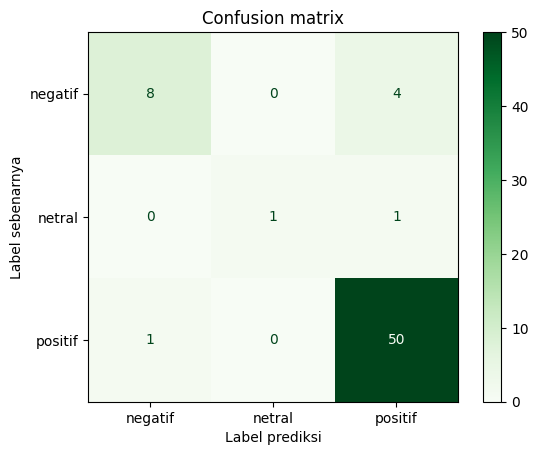

In [84]:
from time import time
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from pandas import DataFrame

t = time()
y_pred = model.predict(x_test)

test_time = time() - t
print("test time:  %0.3fs" % test_time)

score1 = metrics.accuracy_score(y_test, y_pred)
print("accuracy:   %0.3f" % score1)

print(metrics.classification_report(y_test, y_pred, target_names=['negatif', 'netral', 'positif']))

columns = ['negatif','netral','positif']
confm = confusion_matrix(y_test, y_pred)
df_cm = DataFrame(confm, index=columns, columns=columns)

# Use ConfusionMatrixDisplay to create the plot
disp = ConfusionMatrixDisplay(confusion_matrix=confm, display_labels=columns)
disp.plot(cmap='Greens', ax=plt.gca()) # Use plt.gca() to get current axes

plt.title('Confusion matrix')
plt.xlabel('Label prediksi')
plt.ylabel('Label sebenarnya')
plt.show()

In [85]:
from sklearn.metrics import classification_report
report = classification_report(y_test, y_pred, target_names=['negatif', 'netral', 'positif'], output_dict=True)

# Get need value
accuracy = report['accuracy'] * 100
recall_negatif = report['negatif']['recall'] * 100
recall_netral = report['netral']['recall'] * 100
recall_positif = report['positif']['recall'] * 100
precision_negatif = report['negatif']['precision'] * 100
precision_netral = report['netral']['precision'] * 100
precision_positif = report['positif']['precision'] * 100

# try result percentage
print(f"Accuracy: {accuracy:.2f}%")
print(f"Recall (negatif): {recall_negatif:.2f}%")
print(f"Recall (netral): {recall_netral:.2f}%")
print(f"Recall (positif): {recall_positif:.2f}%")
print(f"Precision (negatif): {precision_negatif:.2f}%")
print(f"Precision (netral): {precision_netral:.2f}%")
print(f"Precision (positif): {precision_positif:.2f}%")

Accuracy: 90.77%
Recall (negatif): 66.67%
Recall (netral): 50.00%
Recall (positif): 98.04%
Precision (negatif): 88.89%
Precision (netral): 100.00%
Precision (positif): 90.91%
